In [1]:
import torch

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
NUM_CLASSES = 17
BATCH_SIZE = 32
INPUT_SIZE = (256, 256)

In [2]:
import torch


from trashcan_core.components.data_loader import BinaryCustomDataLoader
from trashcan_core.components.constants import MATERIAL_VERSION_PATH

data_loader = BinaryCustomDataLoader(MATERIAL_VERSION_PATH, batch_size=16)
data_loader.crop(*INPUT_SIZE)

Set lazy cropping to size (256, 256).


In [3]:
image = data_loader.dataset[0][0]  
masks = data_loader.dataset[0][1]

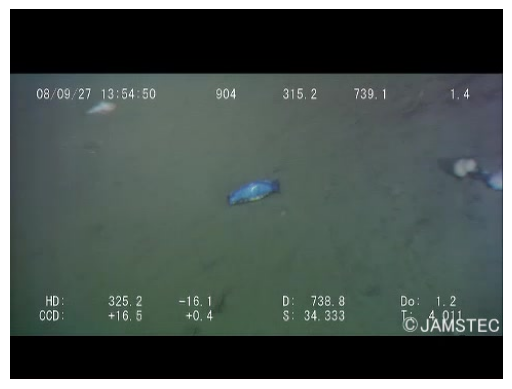

In [4]:
import matplotlib.pyplot as plt
import numpy as np


# Convert to numpy array and transpose to HWC format (128, 128, 3)
image_numpy = image.permute(1, 2, 0).cpu().numpy()

# Clip the pixel values to be in range [0, 1] or [0, 255] depending on the input range
# Assuming the image is in [0, 1] range (if it's normalized)
image_numpy = np.clip(image_numpy, 0, 1)

# Display the image
plt.imshow(image_numpy)
plt.axis('off')  # Hide axes
plt.show()

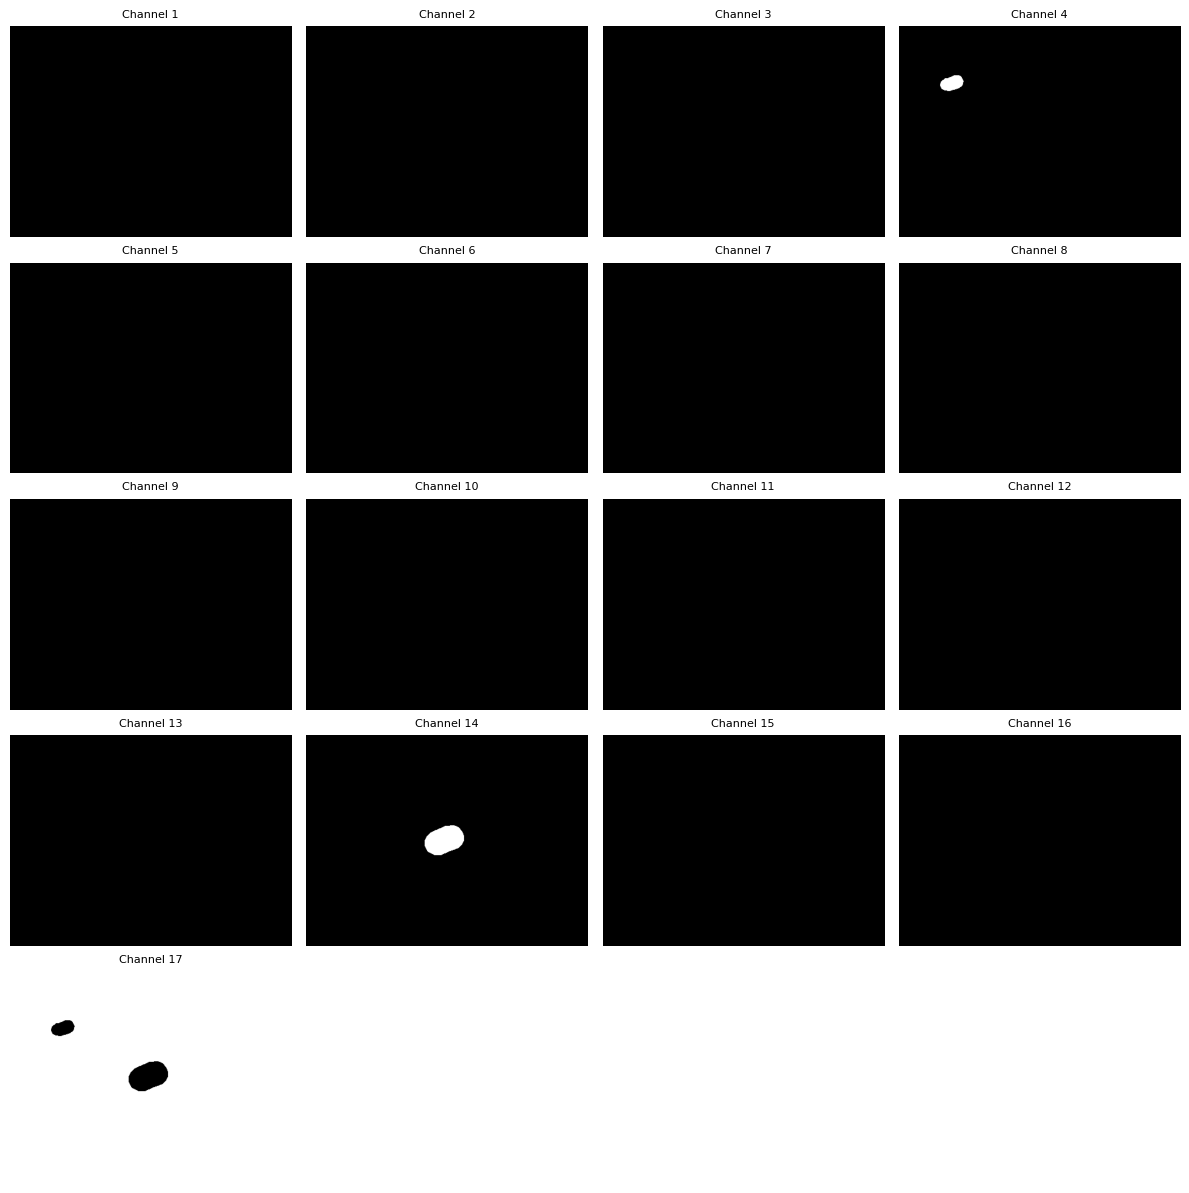

In [5]:
import matplotlib.pyplot as plt
import math

# Number of channels
num_channels = 17  

# Number of rows and columns for the grid
ncols = 4  # Number of columns (adjust as needed for layout)
nrows = math.ceil(num_channels / ncols)  # Compute the number of rows

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 12))

# Flatten axes for easy iteration
axes = axes.flatten()

for i in range(num_channels):
    # Get the mask for the i-th channel
    mask = masks[i].cpu().numpy()
    
    axes[i].imshow(mask, cmap='gray')
    axes[i].set_title(f'Channel {i+1}', fontsize=8)
    axes[i].axis('off')

for j in range(num_channels, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()